# Dynamic LB magnitudes

In [2]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from matplotlib import cm
from itertools import product as prod
from __class_PhononConfig import TwistedRealspacePhonon
from pymatgen.io.vasp.inputs import Poscar
%matplotlib inline

In [3]:
CUT = 2

## MoS2-0

In [4]:
ROOT = '/Users/jonathanlu/Documents'
DIRNAME = "tvMoS2"
THSPC_DIR = "theta"

# Change as necessary
M1_th_min, M1_th_max, M1_ntheta = np.loadtxt(f"{ROOT}/{DIRNAME}/theta.txt")
M1_ntheta = int(M1_ntheta)
KPT = 'Gamma'
print(f"{M1_ntheta} angles from {M1_th_min} to {M1_th_max}")

# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_mags.npy'
ppath = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_phonons.npy'
poscars_uc = [Poscar.from_file(f'{ROOT}/{DIRNAME}/POSCAR_LAYER{i+1}') for i in range(2)]
M1_dataset = np.load(path)
M1_phonons = np.load(ppath)
M1_nmodes = M1_dataset.shape[1]
print("Dataset shape:", M1_dataset.shape)
print("Number of modes:", M1_nmodes)
M1_thetas = np.linspace(M1_th_min, M1_th_max, M1_ntheta)

101 angles from 0.01 to 10.0
Dataset shape: (101, 61, 1521, 3)
Number of modes: 61


In [5]:
M1_mean_umag = np.mean(LA.norm(M1_dataset, axis=-1), axis=2)
M1_max_umag = np.quantile(LA.norm(M1_dataset, axis=-1), 0.75, axis=2)
M1_min_umag = np.quantile(LA.norm(M1_dataset, axis=-1), 0.25, axis=2)
M1_mean_uz = np.mean(M1_dataset[:,:,:,-1], axis=2)
M1_max_uz = np.quantile(M1_dataset[:,:,:,-1], 0.75, axis=2)
M1_min_uz = np.quantile(M1_dataset[:,:,:,-1], 0.25, axis=2)

In [7]:
# Import the indices and extract the modes
M1_LB2_idxs = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB2_idxs.npy')
M1_LB3_idxs = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB3_idxs.npy')

M1_LB2_max = np.zeros(M1_ntheta)
M1_LB2_min = np.zeros(M1_ntheta)
M1_LB2_mean = np.zeros(M1_ntheta)
M1_LB3_max = np.zeros(M1_ntheta)
M1_LB3_min = np.zeros(M1_ntheta)
M1_LB3_mean = np.zeros(M1_ntheta)

for i in range(M1_ntheta):
    M1_LB2_max[i] = M1_max_umag[i, M1_LB2_idxs[i]]
    M1_LB2_min[i] = M1_min_umag[i, M1_LB2_idxs[i]]
    M1_LB2_mean[i] = M1_mean_umag[i, M1_LB2_idxs[i]]
    
    M1_LB3_max[i] = M1_max_umag[i, M1_LB3_idxs[i]]
    M1_LB3_min[i] = M1_min_umag[i, M1_LB3_idxs[i]]
    M1_LB3_mean[i] = M1_mean_umag[i, M1_LB3_idxs[i]]

<Figure size 432x288 with 0 Axes>

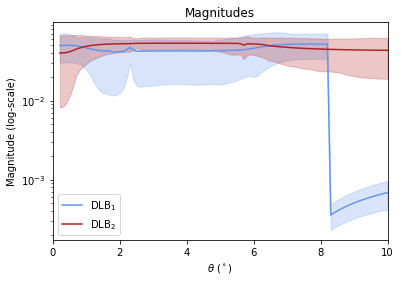

In [14]:
plt.clf()
_, ax = plt.subplots()
ax.set_title(fr"Magnitudes")
ax.set_xlabel(r'$\theta$ ($^\circ$)')
ax.set_ylabel(r'Magnitude (log-scale)')

# MoS2-0
ax.plot(M1_thetas[CUT:], M1_LB2_mean[CUT:], color='cornflowerblue', label=r'DLB$_1$')
ax.fill_between(M1_thetas[CUT:], M1_LB2_min[CUT:], M1_LB2_max[CUT:], color='cornflowerblue', alpha=0.25)
ax.plot(M1_thetas[CUT:], M1_LB3_mean[CUT:], color='firebrick', label=r'DLB$_2$')
ax.fill_between(M1_thetas[CUT:], M1_LB3_min[CUT:], M1_LB3_max[CUT:], color='firebrick', alpha=0.25)

ax.legend(loc='lower left')
ax.set_yscale("log")
plt.xlim((0,10))
plt.savefig("/Users/jonathanlu/Documents/data_mlph/MoS2_mags.pdf")
plt.show()